## HW8_dcr346

# Creating a plot Assignment: Permits Issuance Data (DOB)

Author: Dana Chermesh, CUSP 2017

The objective of this assignment was to get a picture of the urban development level / situation of the city by viewing the amount of permits issued, categorically seperated by permit types, for each of all 5 New York City's boroughs. Data were retrieved from [CUSP Data Facility DOB permit issuance data](http://urbanprofiler.cloudapp.net/dataset/ipu4-2q9a/)

In [10]:
from __future__ import division

import numpy as np
import pandas as pd
import sys
import os
import pylab as pl
import statsmodels.formula.api as smf
import geopandas as gp
from shapely.geometry import Point
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
DFDATA = os.getenv('DFDATA')
print(DFDATA)

/gws/open/NYCOpenData/nycopendata/data


In [3]:
dfDOB = pd.read_csv(DFDATA+'/ipu4-2q9a/1433008929/ipu4-2q9a')
dfDOB.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,8,9,11,12,31,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,BOROUGH,Bin #,House #,Street Name,Job #,Job doc. #,Job Type,Self_Cert,Block,Lot,...,Owner's Business Name,Owner's First Name,Owner's Last Name,Owner's House #,Owner's House Street Name,Owner’s House City,Owner’s House State,Owner’s House Zip Code,Owner's Phone #,DOBRunDate
0,MANHATTAN,1030531,266,WEST 73 STREET,140325315.0,1.0,A2,NaN,1164,58,...,"266 WEST 73 STREET, LLC",CELSO,VASQUEZ,163,WEST 74 STREET,NEW YORK,NY,10023,2125959590,05/30/2015 12:00:00 AM
1,MANHATTAN,1044119,244,EAST 78TH STREET,121584035.0,1.0,A2,NaN,1432,34,...,244 EAST 78 REALTY LLC,TERRENCE,LOWENBERG,433,WEST 14TH STREET,NEW YORK,NY,10014,2126612700,05/30/2015 12:00:00 AM
2,MANHATTAN,1015146,839,AVE OF THE AMERICAS,122359401.0,2.0,A2,Y,805,7502,...,835 6TH AVE MASTER L.P,STEPHAN,OREFICE,590,MADISON AVE,NEW YORK,NY,10022,2129014937,05/30/2015 12:00:00 AM
3,BROOKLYN,3245564,7,CORBIN PLACE,320561897.0,1.0,NB,NaN,8713,900,...,"7 CORBIN PLACE, LLC.",OLEG,KRASNITSKY,7,CORBIN PLACE,BROOKLYN,NY,11235,6464963287,05/30/2015 12:00:00 AM
4,QUEENS,4047393,102-32,CORONA AVENUE,440194246.0,1.0,A2,Y,1928,18,...,"GK 48 HOLDINGS, LLC",JOSEPH,MALATESTA,47-10,104TH STREET,CORONA,NY,11368,7182053334,05/30/2015 12:00:00 AM


In [4]:
dfDOB.columns

Index([u'BOROUGH', u'Bin #', u'House #', u'Street Name', u'Job #',
       u'Job doc. #', u'Job Type', u'Self_Cert', u'Block', u'Lot',
       u'Community Board', u'Zip Code', u'Bldg Type', u'Residential',
       u'Special District 1', u'Special District 2', u'Work Type',
       u'Permit Status', u'Filing Status', u'Permit Type',
       u'Permit Sequence #', u'Permit Subtype', u'Oil Gas', u'Site Fill',
       u'Filing Date', u'Issuance Date', u'Expiration Date', u'Job Start Date',
       u'Permittee's First Name', u'Permittee's Last Name',
       u'Permittee's Business Name', u'Permittee's Phone #',
       u'Permittee's License Type', u'Permittee's License #',
       u'Act as Superintendent', u'Permittee's Other Title', u'HIC License',
       u'Site Safety Mgr's First Name', u'Site Safety Mgr's Last Name',
       u'Site Safety Mgr Business Name', u'Superintendent First & Last Name',
       u'Superintendent Business Name', u'Owner's Business Type',
       u'Non-Profit', u'Owner's Business

### Cleaning data, selecting Permit type + Borough data only


In [5]:
dfDOB = dfDOB[['BOROUGH','Permit Type']]
dfDOB = dfDOB.dropna(0)
len(dfDOB)

354132

### Permit Types Codes:
https://www1.nyc.gov/assets/buildings/pdf/bisjobstatus.pdf

* I chose to plot **New Building**, **Alternation** and **Earthwork** permit types only, to get a better sense of the development level of each borough and due to the fact that other permit types refer to plumbing issues, signs, etc.

In [6]:
New_Building = dfDOB['BOROUGH'][dfDOB['Permit Type'] == 'NB'].value_counts()
Alternation = dfDOB['BOROUGH'][dfDOB['Permit Type'] == 'AL'].value_counts()
Earthwork = dfDOB['BOROUGH'][dfDOB['Permit Type'] == 'FO'].value_counts()

In [7]:
New_Building

BROOKLYN         4175
QUEENS           3907
STATEN ISLAND    2336
MANHATTAN        1303
BRONX            1182
Name: BOROUGH, dtype: int64

In [16]:
permits = pd.DataFrame({'New Building': New_Building, 'Alternation': Alternation, 'Earthwork': Earthwork})
permits





,Alternation,Earthwork,New Building
BRONX,2218,468,1182
BROOKLYN,7147,4004,4175
MANHATTAN,6992,903,1303
QUEENS,6194,3992,3907
STATEN ISLAND,1165,26,2336


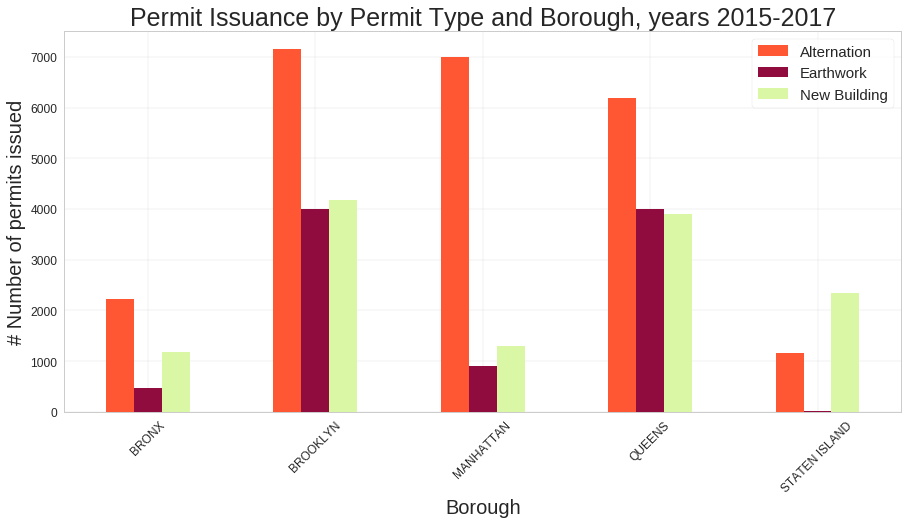

In [17]:
pl.figure(figsize = (15,8))
sns.set_style("whitegrid")

permits.plot(kind='bar', figsize=(15,7), color = ('#FF5733', '#900C3F','#DAF7A6'))
pl.title('Permit Issuance by Permit Type and Borough, years 2015-2017', fontsize=25)
pl.xlabel('Borough', fontsize=20)
pl.ylabel('# Number of permits issued', fontsize=20)
pl.xticks(fontsize = 12, rotation=45)
pl.yticks(fontsize = 12)
pl.legend(fontsize = 15, frameon=True)
plt.grid(linewidth=0.25) 


### Fig.1 Permit Issuance by Permit Type and Borough, years 2015-2017
It is clear that **Brooklyn** and **Queens** are relatively more developing and / or changing, with large numbers of permits from the three selected types. These two boroughs have also the highest numbers of _New Buildings_ permissions, as well as _demolishings_ (= Earthwork). **Manhattan**, which we know is also facing a rapidly urban development, seems to experience it more in the building _Alternations_ level rather than in new constructions. This makes sense due to the lack of free space in Manhattan and its high density urban areas. **Staten Island** and **Bronx** are the less developing botoughs of the city, as we could have guessed.